# 1)	Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import itertools

In [2]:
# rcParams is used to set the figure size of the plots
rcParams['figure.figsize'] = 17.5, 14

# 2)	Reading CSV and preliminary visualizations

In this section we will read the csv, analyse the data using some visualizations and then decide which model to choose for modelling and analyzing the timeseries.


## Reading csv and making it ready to use for timeseries

In [3]:
data = pd.read_csv("MER_T12_06.csv")  # Reading the csv file
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
data.info() # Understanding the structure of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
# Converting the existing 'YYYYMM' date column into datetime format
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
data = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
data.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
data.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


The NaT row contains annual observations of total CO2 emissions from all energy sources. Remove the non-datetime index rows and replace the dataframe df with ts to represent the time series dataset. Convert the index to datetime format, handle any mistakes, and filter out NaT values.

In [7]:
ts = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values] #Converting the index value to datetime format
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [9]:
# Converting the value column to numeric
#errors='coerce' parameter is set to convert any non-numeric values to NaN (Not a Number).

ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce') 
ts.head()

C:\Users\usama\AppData\Local\Temp\ipykernel_14940\313542588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')


,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


4323 observations have emissions value and therefore, we will drop the empty rows emissions value. 

In [11]:
ts.dropna(inplace = True) # Removing the rows with missing values.

C:\Users\usama\AppData\Local\Temp\ipykernel_14940\1037952559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.dropna(inplace = True) # Removing the rows with missing values.


## Data visualizations

In [12]:
Energy_sources = ts.groupby('Description') # Grouping the ts dataframe by column description and creating a groupby object called 'Energy_sources'
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


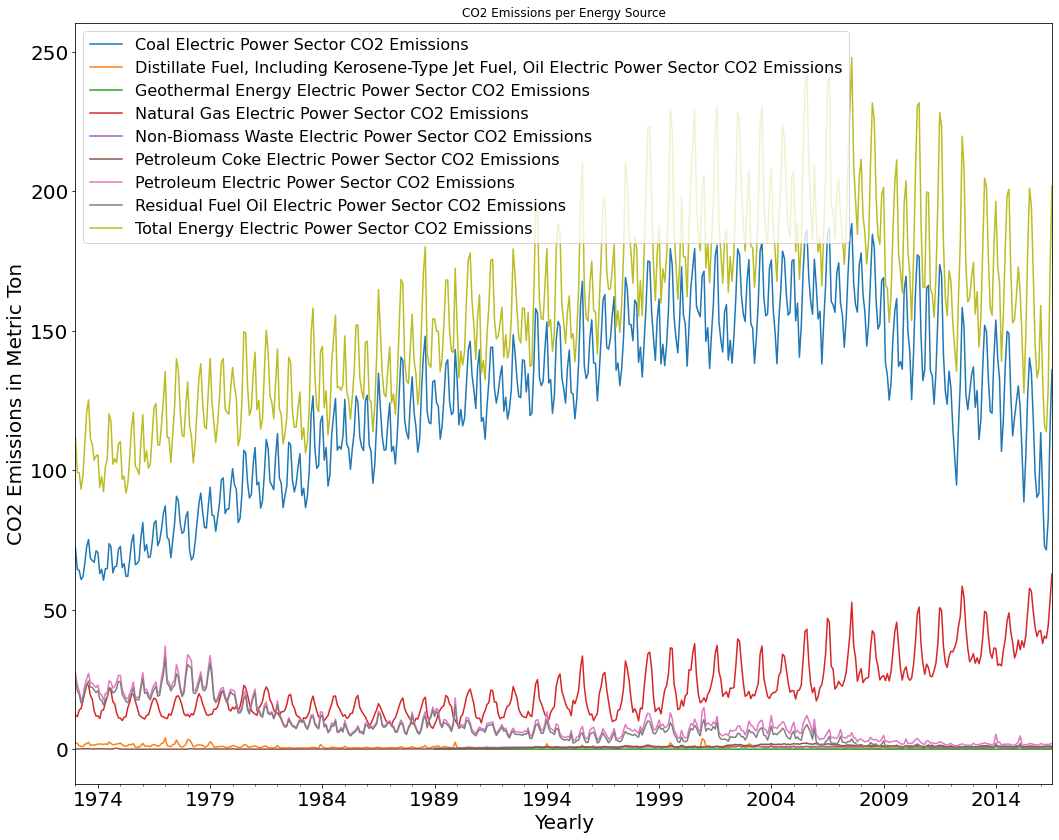

In [13]:
# Yearly co2 emissions per energy souces.
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='CO2 Emissions per Energy Source', fontsize = 20) 
    ax.set_xlabel('Yearly')
    ax.set_ylabel('CO2 Emissions in Metric Ton')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

In the above plot coal's contribution to global CO2 emissions peaked between 1973 and 2006, and then began to fall until 2016. 

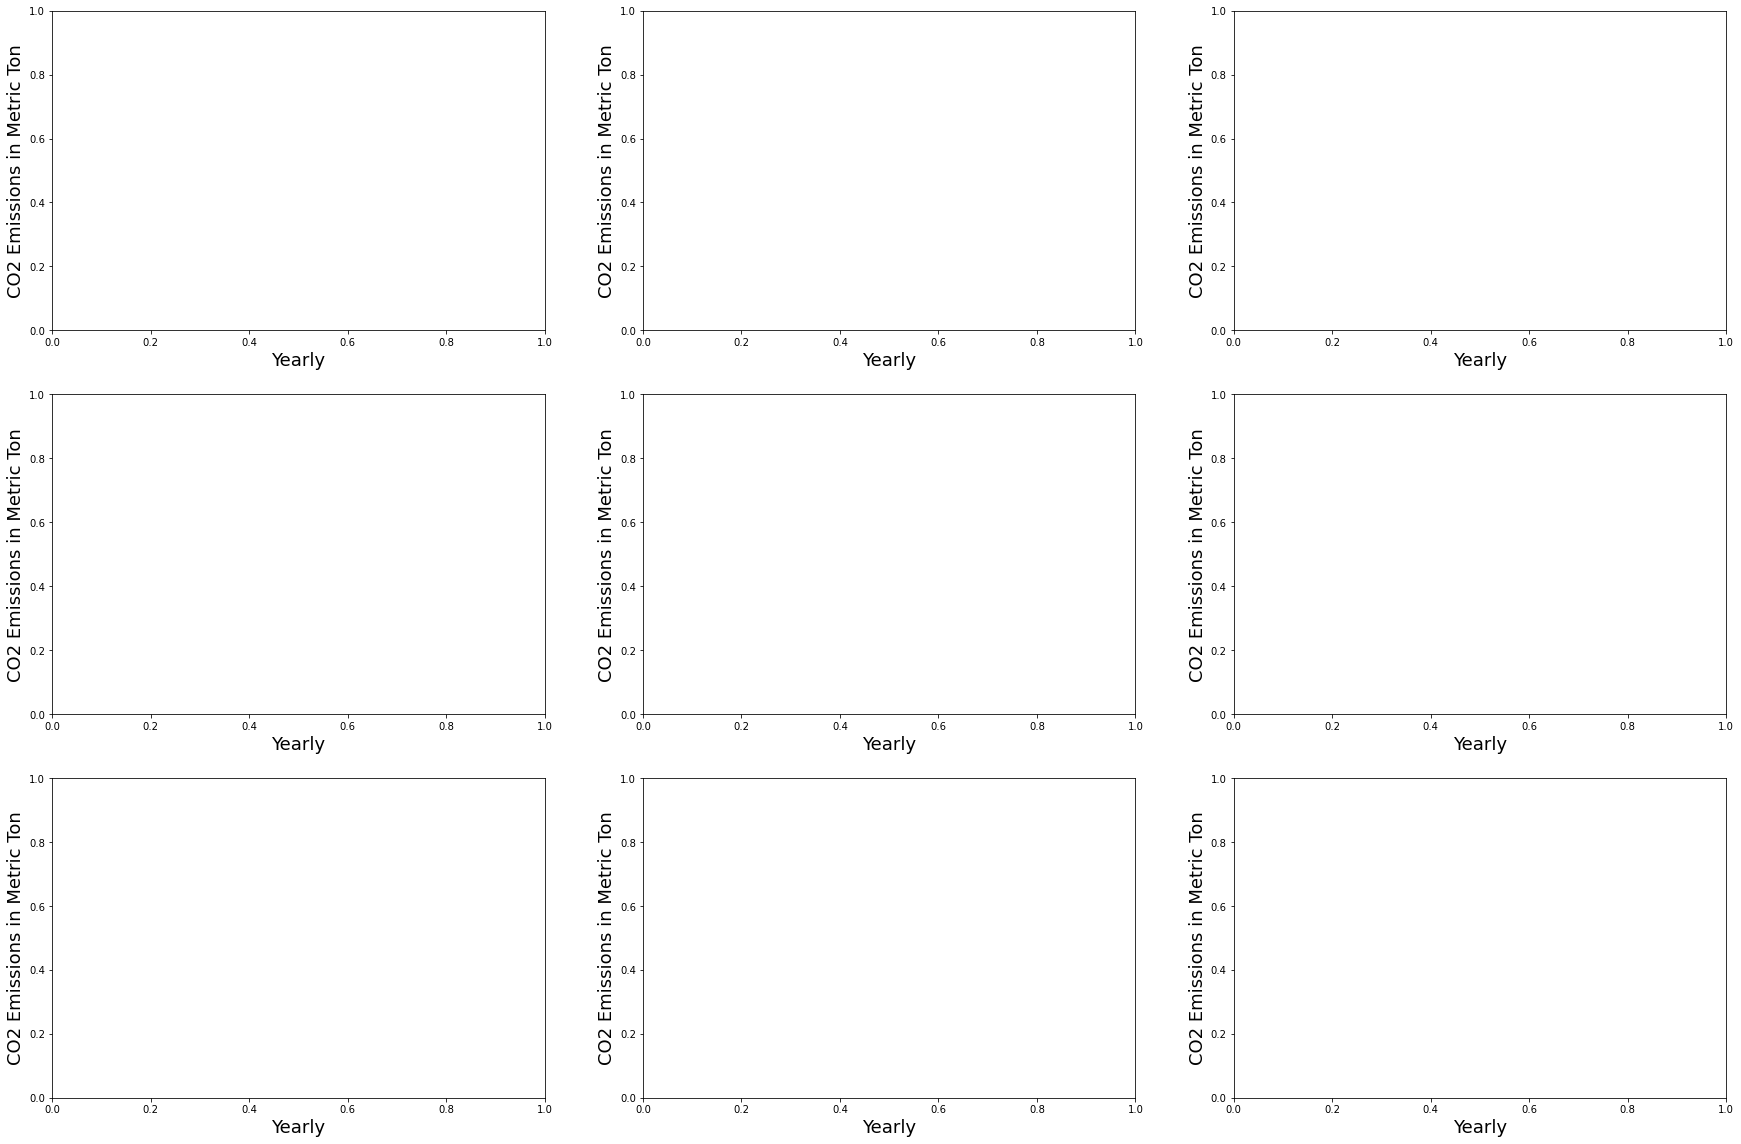

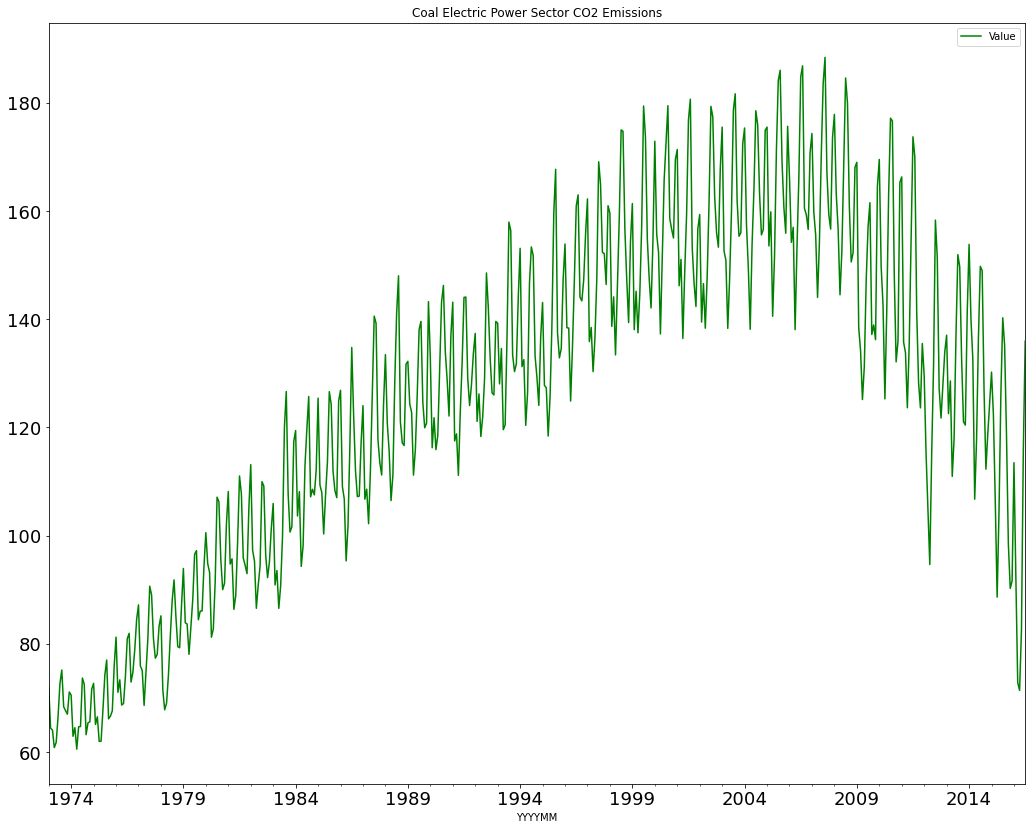

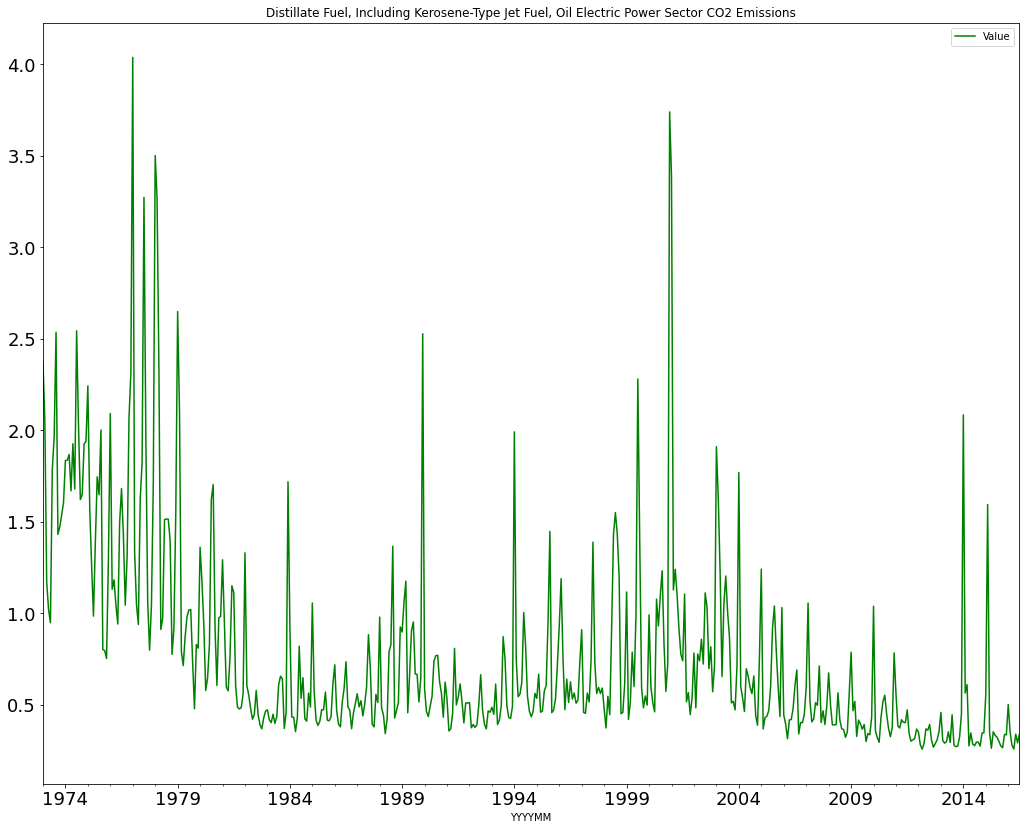

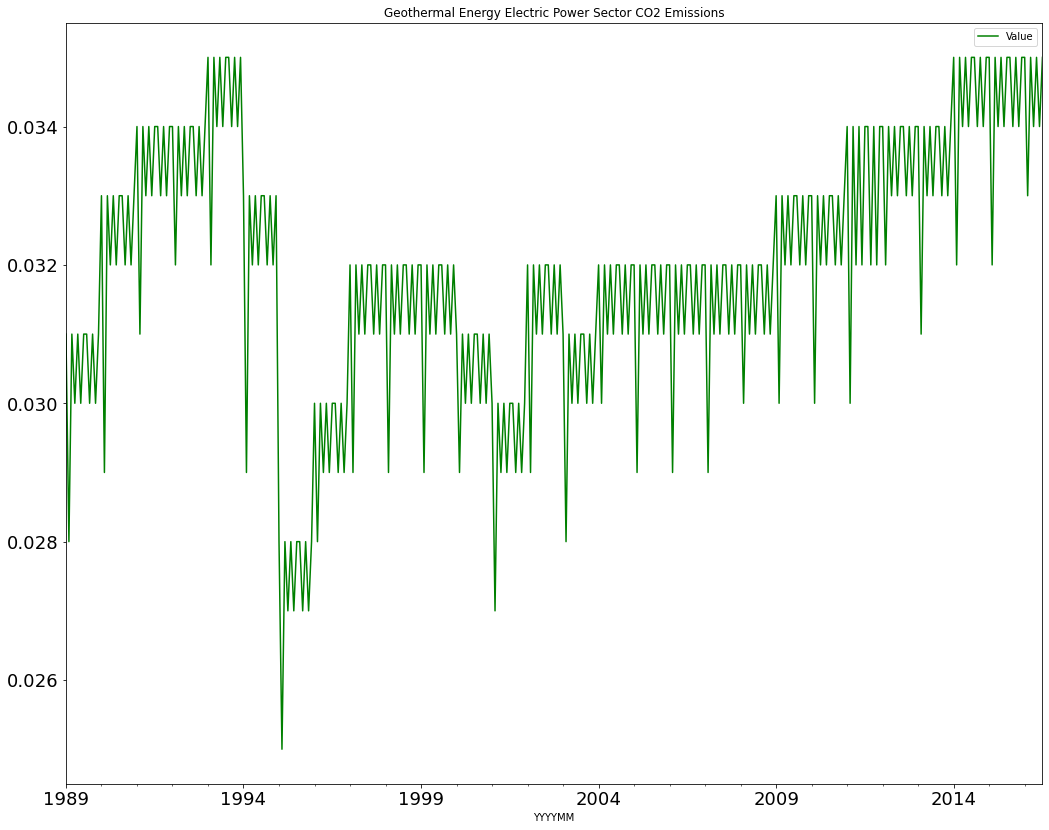

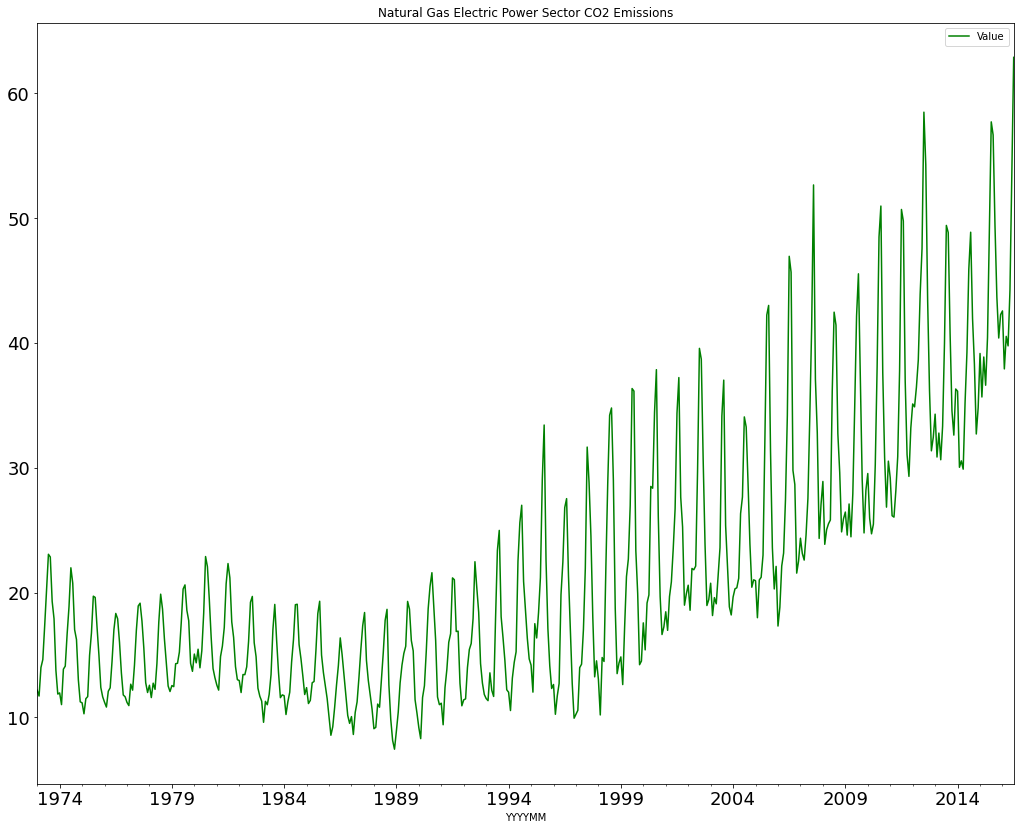

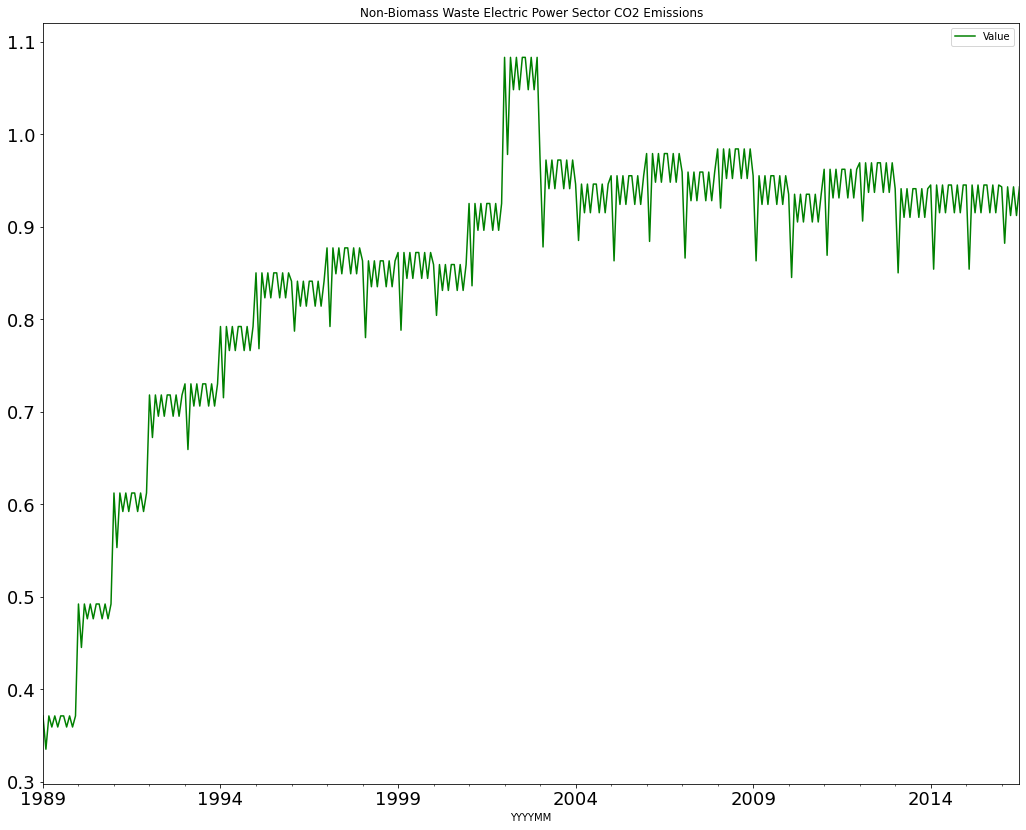

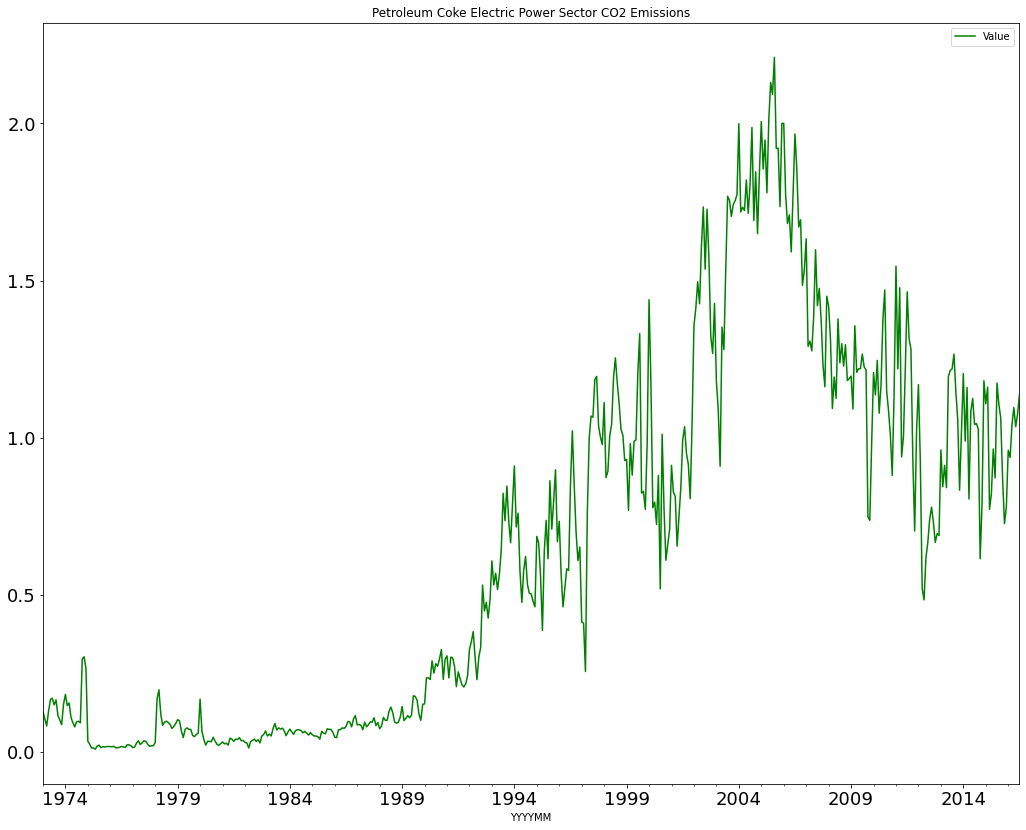

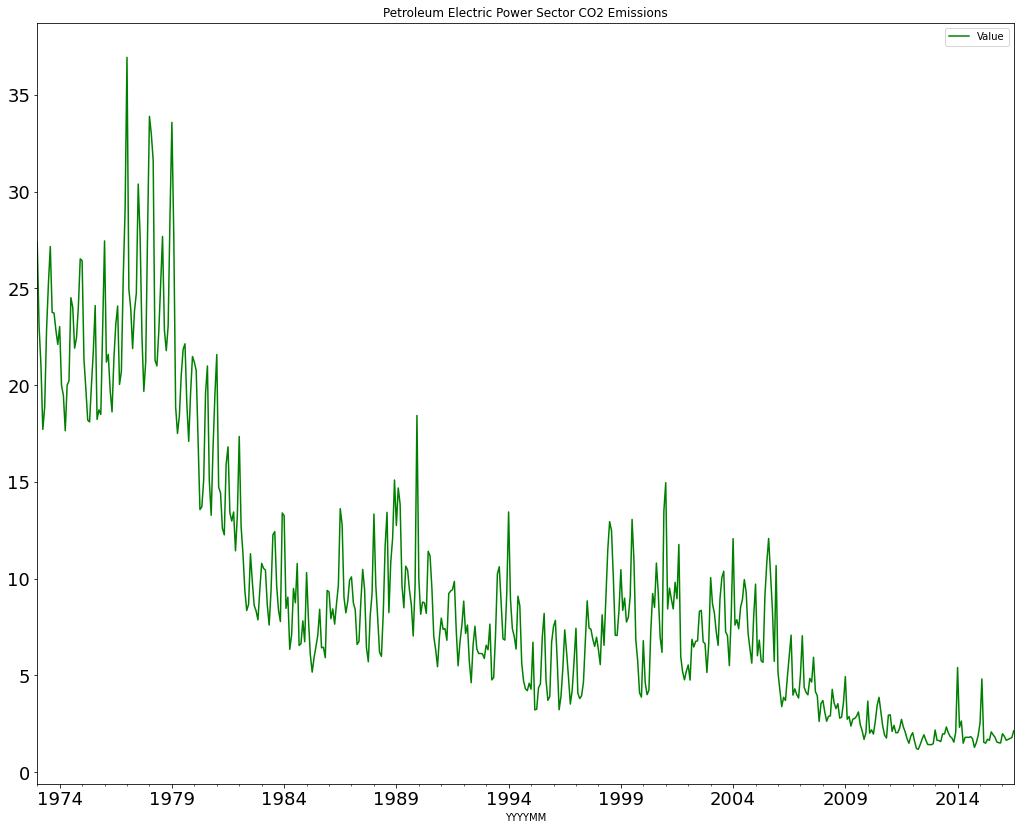

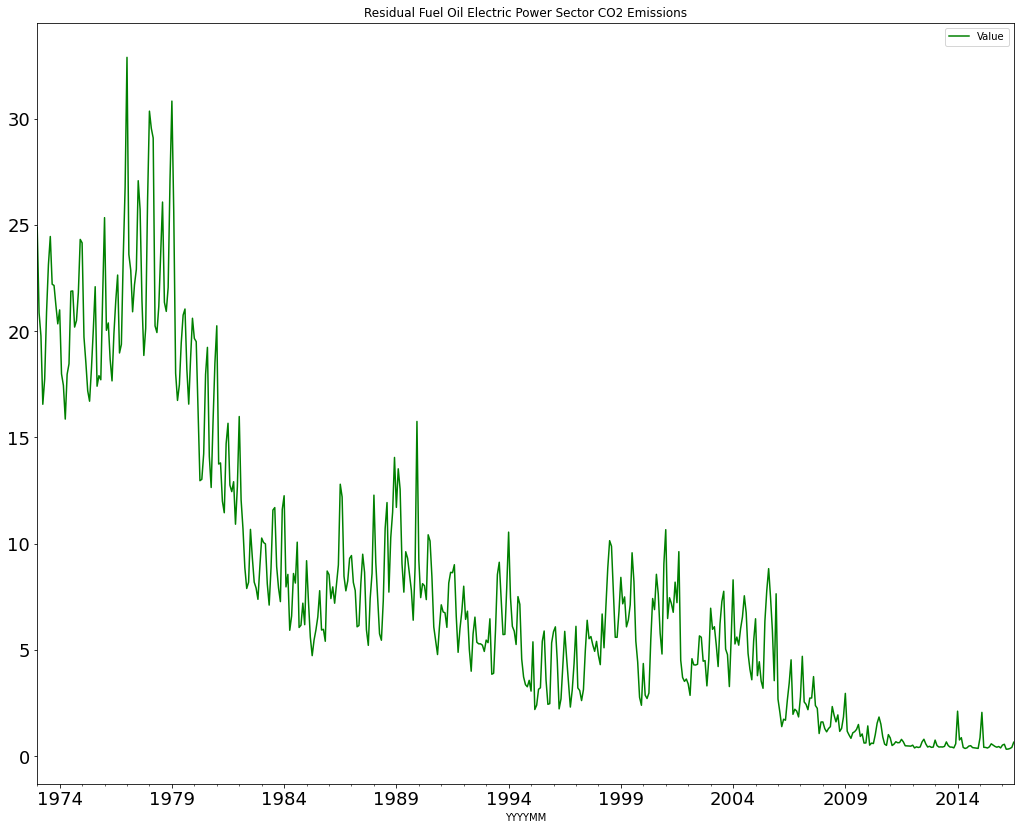

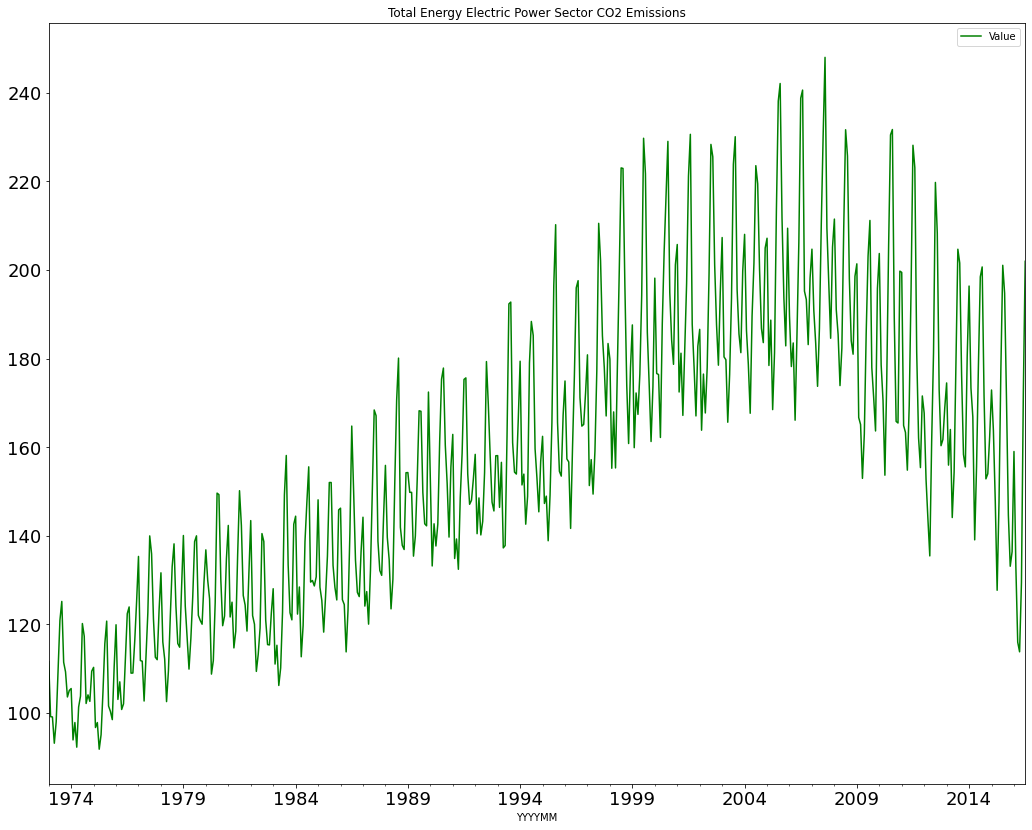

In [14]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))

for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value', title=desc, fontsize = 18, color=(0, 0.5, 0))
    ax.set_xlabel('Yearly')
    ax.set_ylabel('CO2 Emissions in Metric Ton')
    
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

Natural gas use has been on the rise in recent years.
The above graphs shows that the co2 emissions from coal is decreasing and through natural gas it is increasing.


   ## Bar chart of CO2 Emissions per energy source

In [15]:
# Taking Groupby on description column from ts dataframe and taking the sum of the value column.Also the result is sorted in ascending order.
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values() 

In [16]:
#Checking the index column names from CO2_per_source dataframe
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [17]:
#converting into shorter descriptions that will be used for better readability in the bar chart.
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

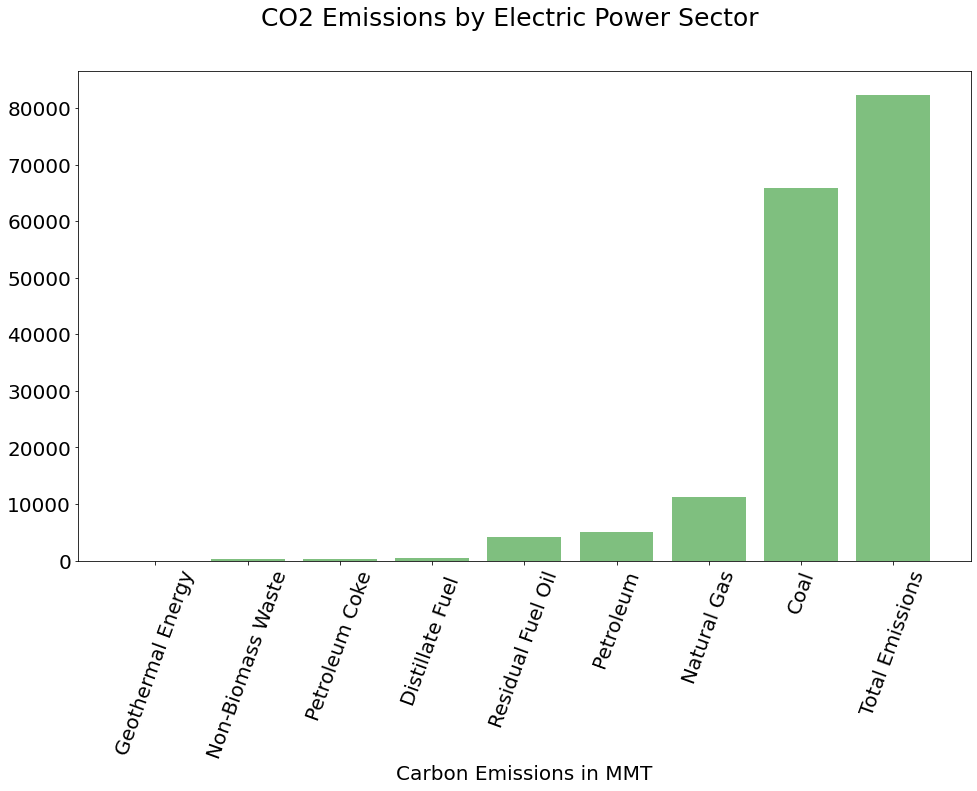

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5, color=(0, 0.5, 0))
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

Coal is the largest single contributor to total CO2 emissions, as seen by the bar chart, followed by natural gas.**


# 3) Natural gas CO2 emission analysis

Natural gas CO2 emissions from electricity generation will be used in our time series model development and forecasting.  


In [19]:
# seperating the ts from the Data
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
# 'Value' column in the ts DataFrame is grouped by the 'Description' and monthly time frequency using the pd.Grouper().
# The sum of each dataframe is calculated and unstacked into a new dataframe called Emissions.
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [20]:
mte.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

## Test Data Stationary

In [21]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

## Graphically test stationary

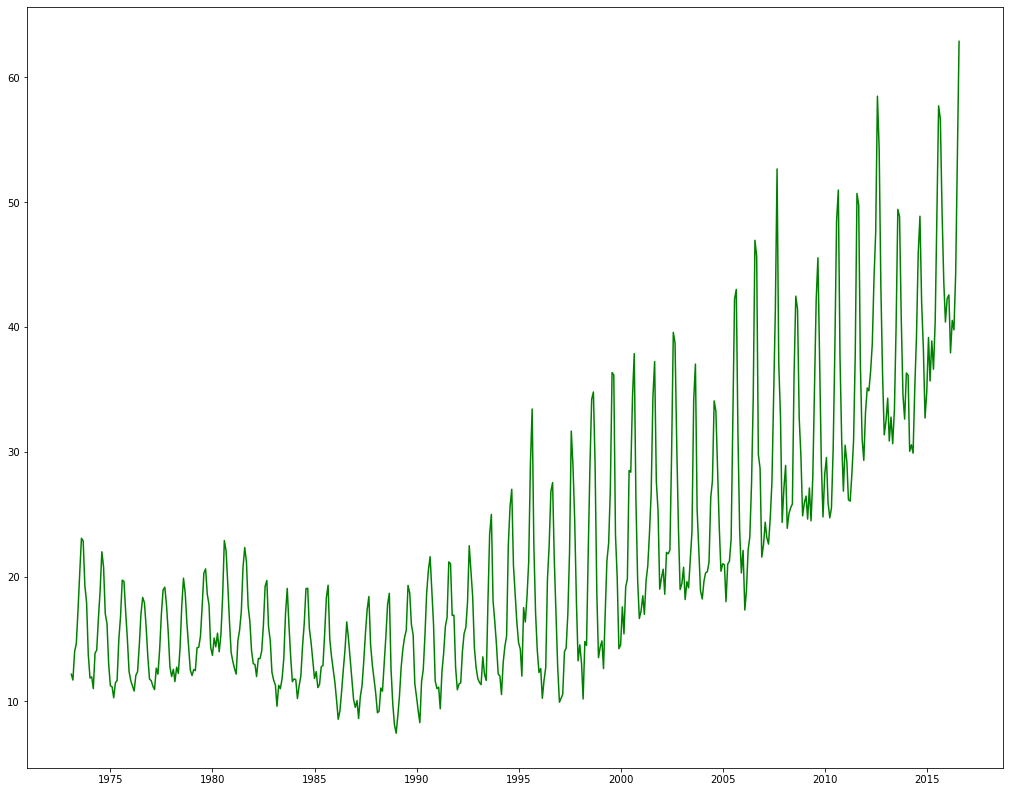

In [22]:
plt.plot(mte, color=(0, 0.5, 0)) # Plotting the timeseries on mte dataframe

From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer that the dataset is not stationary.

## Test  stationary using Dickey-Fuller

In [23]:
# TestStationaryPlot() plots the original data, rolling mean, and rolling standard deviation.
def TestStationaryPlot(ts, plot_label = None):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'green',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='blue', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Years', fontsize = 25)
    plt.ylabel('Total CO2 Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    if plot_label is not None:
        plt.title('Rolling Mean & Standard Deviation (' + plot_label + ')', fontsize = 25)
    else:
        plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [24]:
#TestStationaryAdfuller() performs the augmented Dickey-Fuller test and displays the test statistics and p-values. 
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

### Testing the monthly emissions time series

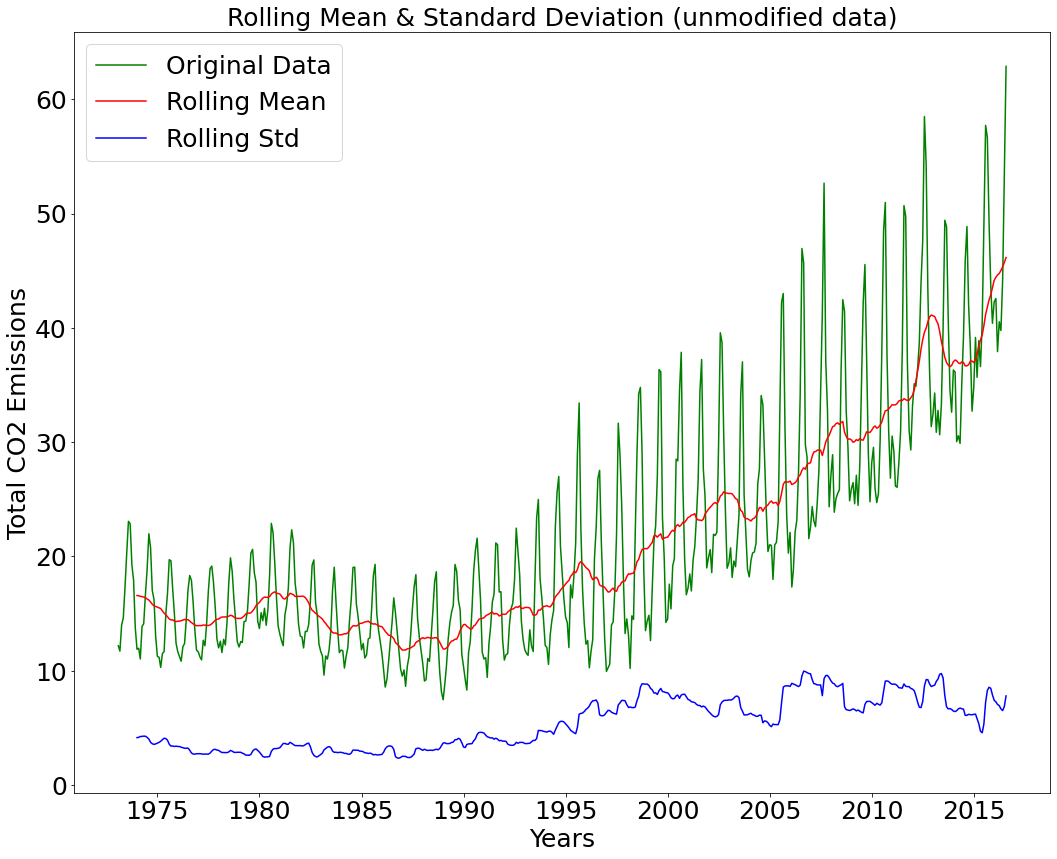

In [25]:
TestStationaryPlot(mte, 'unmodified data')

In [26]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The mean and standard deviation of the emissions (represented by the black line) exhibit temporal dependence, indicating a pattern in the series rather than a fixed location. Additionally, the Test Statistic surpasses the critical values at the 90%, 95%, and 99% confidence levels. Thus, we cannot consider this series as stationary, and we must accept the null hypothesis. 


# Transform the dataset to stationary using differencing

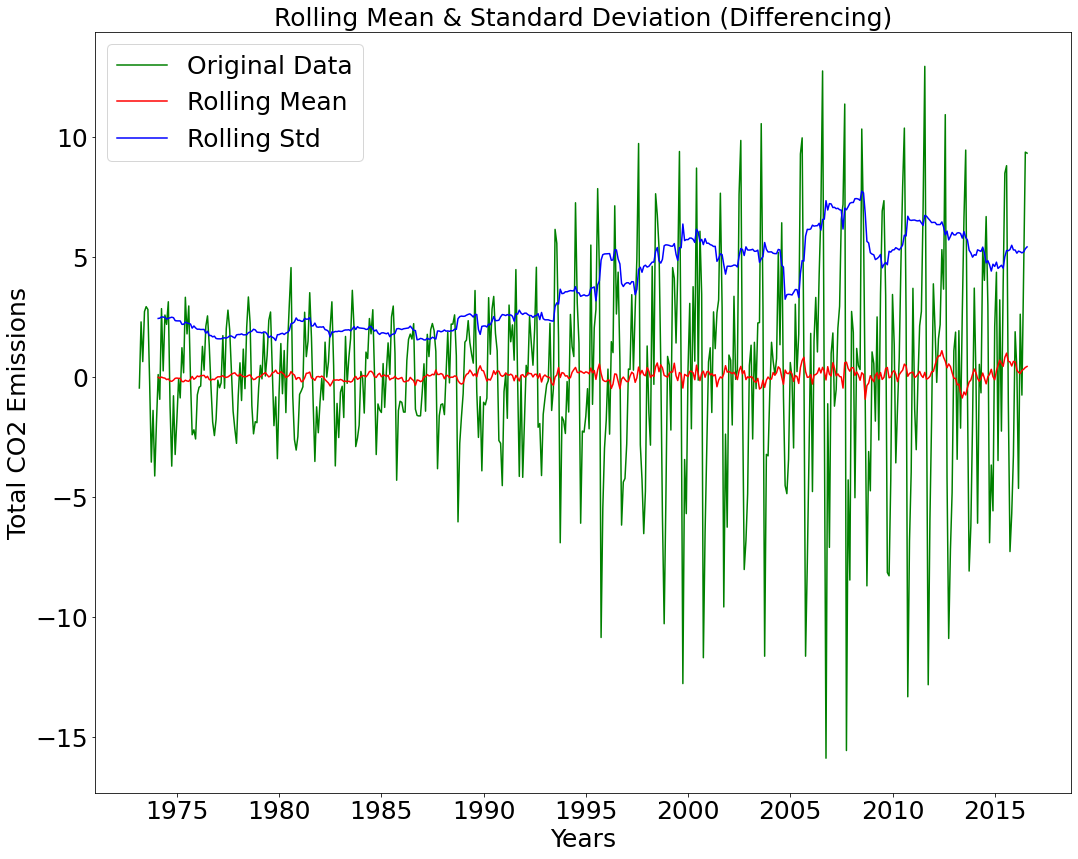

In [27]:
# The mte time series is differenced with its lagged values using the shift() function, creating a new time series called 'mte_first_difference'.
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False), 'Differencing')

In [28]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Applying the first difference significantly enhances the stationarity of the series. To delve deeper into the impact of using the seasonal difference on data stationarity, once seasonality has been eliminated.

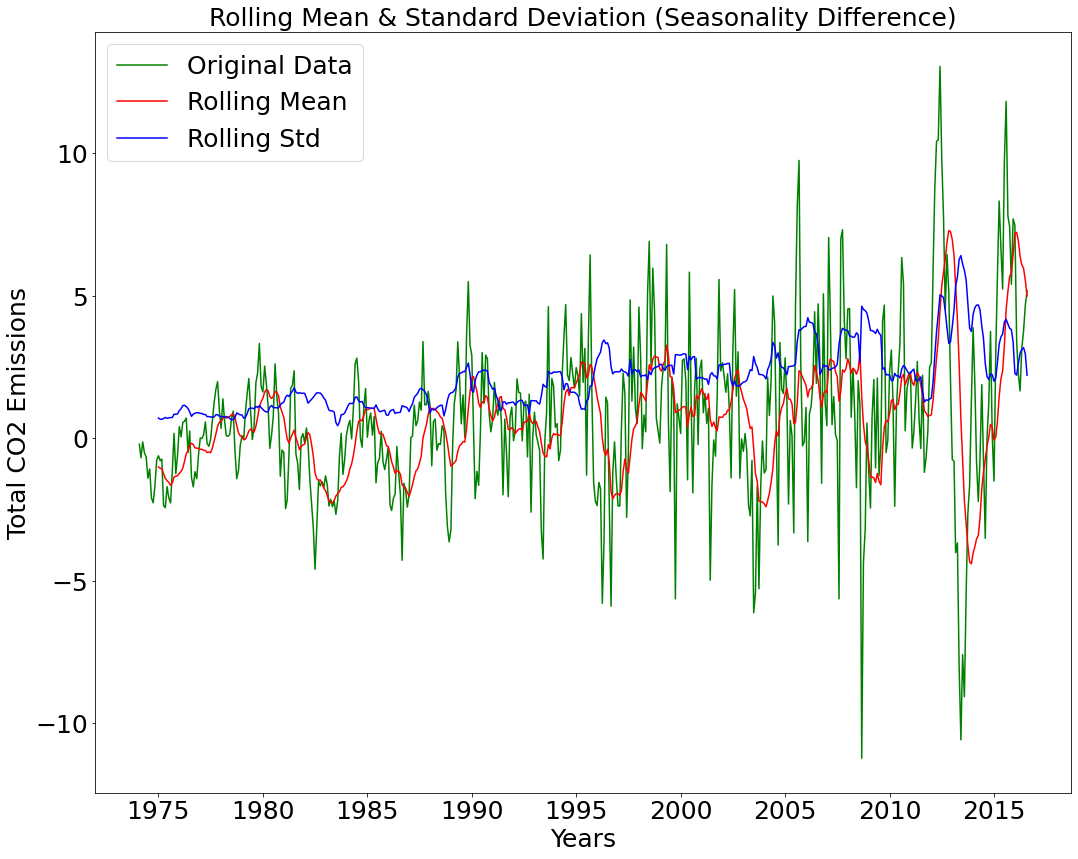

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [29]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False), 'Seasonality Difference')
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

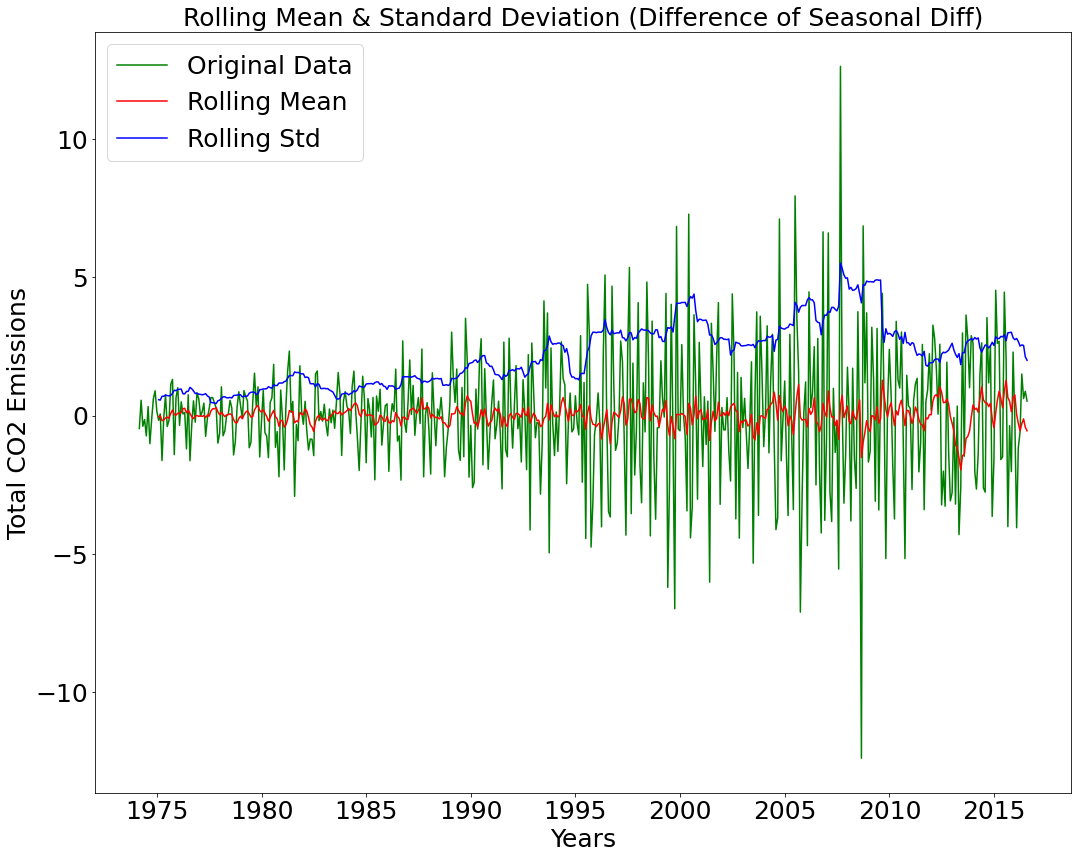

In [30]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False), 'Difference of Seasonal Diff')

In [31]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The time series dataset achieved stationarity by applying the seasonal first difference, as indicated by the Test Statistic and the p-value. Attempting the same differencing process on the log values did not affect the dataset's lack of stability.

# 4) Find optimal parameters and build SARIMA model

# Plotting the ACF and PACF charts and find the optimal parameters

C:\Users\usama\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


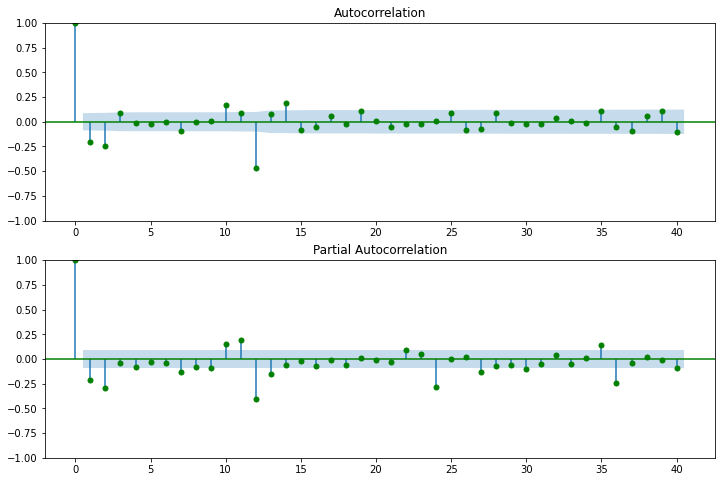

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1,color='green') #ACF plot is generated using this.
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2,color='green') # PACF plot is generated using this. 

The above plots helps in identifying the AR and MA parameters of the SARIMAX model. 

# Grid search method

In [33]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [34]:
aic_results = []
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            if results.mle_retvals is not None and results.mle_retvals['converged'] == False:
                print(results.mle_retvals)
            aic_results.append(results.aic)
        except:
            continue
aic_results.sort()
print('Best AIC found: ', aic_results[0])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4804.065995091218
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4135.625648186424
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2572.1947577443725
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2504.2095028358426
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2544.146426616797
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2465.147262997096
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.8402380709176
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4157.5612255157685
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3572.1059017453754
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2334.72472540896
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2245.507386420824
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2329.0446014050904
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2218.6800976692125
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2262.0627979900105
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2247.5327721889043
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2616.012810818768
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:23

C:\Users\usama\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:2295.7488324804553
{'fopt': 2.190964466998523, 'gopt': array([1.51203494e-05, 2.14783746e-06]), 'fcalls': 51, 'warnflag': 2, 'converged': False, 'iterations': 0}
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:2108.956656305104
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:2162.692421772816
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2074.0481533369625
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2842.7367252748636
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2581.5410372142005
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:2281.274819451161
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2040.5852777128518
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:2268.8025053297815
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2080.7520754806055
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:2123.2977562957685
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2044.9914025255332
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:2937.6528799025127
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:2620.0970602333864
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:2249.1777868567337
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:2046.0322860770

C:\Users\usama\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:2240.1412918871547
{'fopt': 2.135890336412194, 'gopt': array([6.08091355e-06, 7.92790722e-05, 2.35149678e-06]), 'fcalls': 204, 'warnflag': 2, 'converged': False, 'iterations': 10}
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:2003.5534515456163
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:2219.728927238637
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2043.6020472925238
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:2096.2412677851853
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:2005.5002845385402
Best AIC found:  2003.5534515456163


SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 2003.553. Therefore, we will consider this to be optimal option out of all the parameter combinations. We have identified the set of parameters that produces the best fitting model to our time series data. We will now proceed to analyze this particular model in more depth.

In [35]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sun, 07 May 2023   AIC                           2003.553
Time:                                                     00:17:33   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

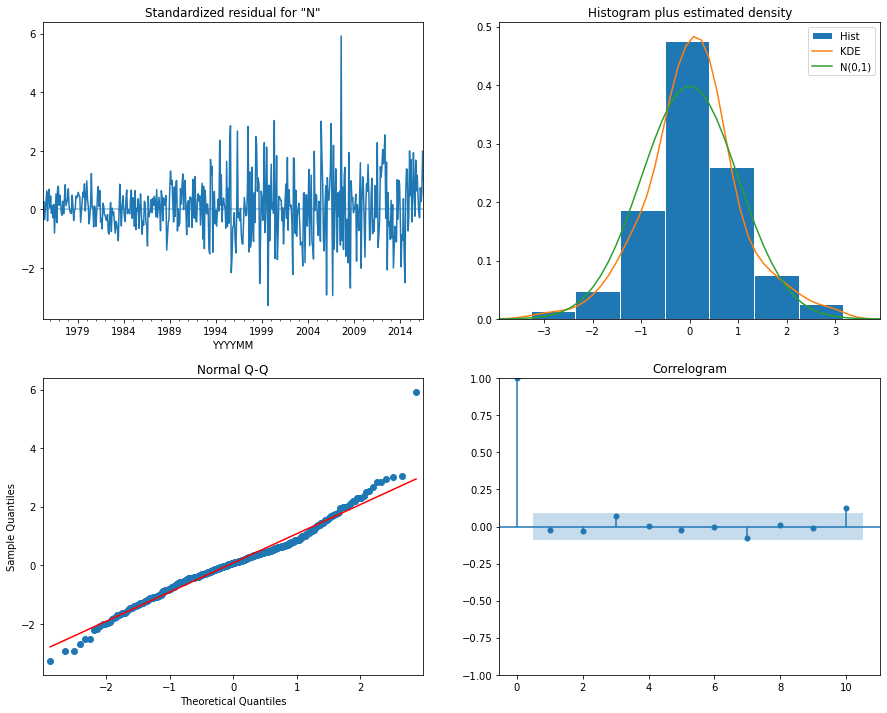

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostic indicates that the residual of the model follows a normal distribution:

- The top right plot shows a close alignment between the red KDE line and the blue N(0,1) line, indicating a normal distribution.
- The qq-plot on the bottom left reflects the linear trend of samples drawn from a normal distribution, suggesting normality in the residuals.
- The time series of residuals (top left) displays no discernible seasonality and appears like random noise.
- The autocorrelation plot on the right demonstrates weak correlation between the residuals and their own lags.

Based on these findings, we conclude that the model is a good fit and has the potential to assist in understanding and forecasting the time series data.


# 5) Validating prediction

With a model in place for our time series, we can proceed to make predictions. To assess the accuracy of our forecast, we compare our assumptions to the actual values of the time series. By utilizing the properties get_prediction() and conf_int(), we can acquire predictions along with their associated confidence intervals.


In [37]:
pred = results.get_prediction(start = 480, end = 522, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,,
2013-01-31,30.203835,37.257325
2013-02-28,29.088380,36.141870
2013-03-31,28.958985,36.012475
2013-04-30,30.708073,37.761563
2013-05-31,32.104079,39.157569


Setting dynamic=False ensures that our predictions use the entire historical data up to the current point, enabling one-step forward projections.

To assess the model's accuracy, we can plot the actual and predicted values of the CO2 emission time series to observe their alignment.


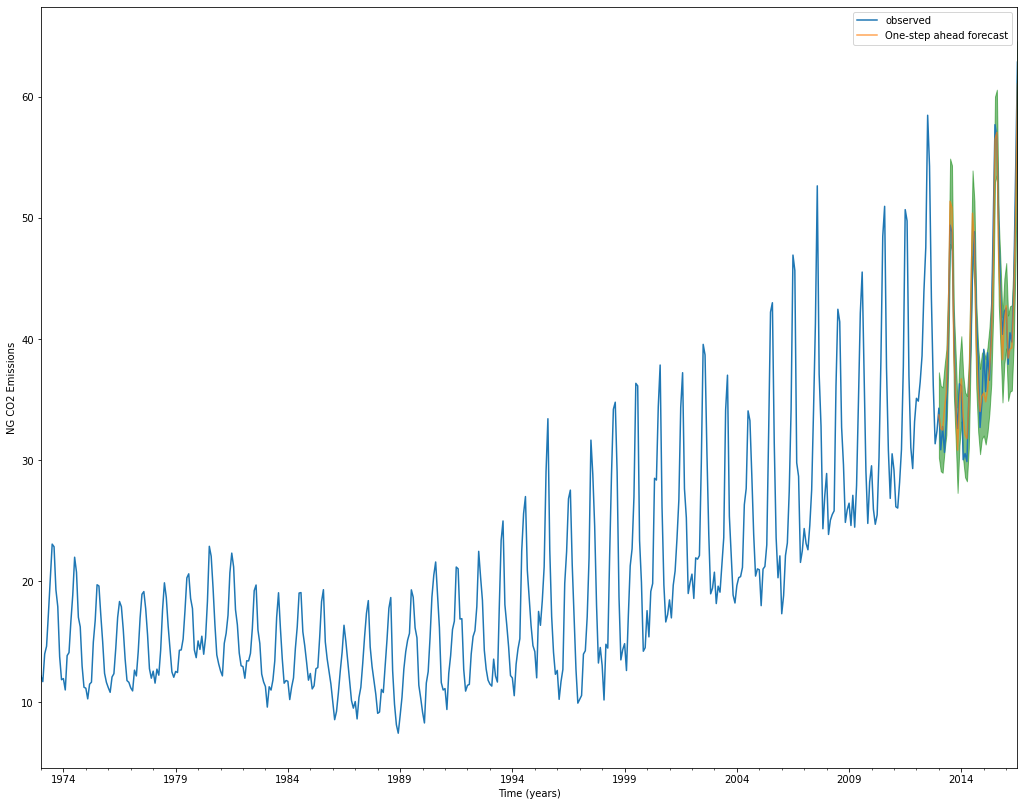

In [38]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='green', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [39]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forecast: 2.0236


In [40]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

The goal of model development is to achieve accurate predictions using dynamic prediction. This means utilizing data from the time series up to a specific point and generating projections based on the previously predicted values.


In [41]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

When visualizing the observed and predicted values of the time series through a scatter plot, we observe that the dynamic forecast produces consistently reliable predictions. The projected values (represented by the red line) fall well within the confidence ranges and closely resemble the original observed data (depicted by the blue line).


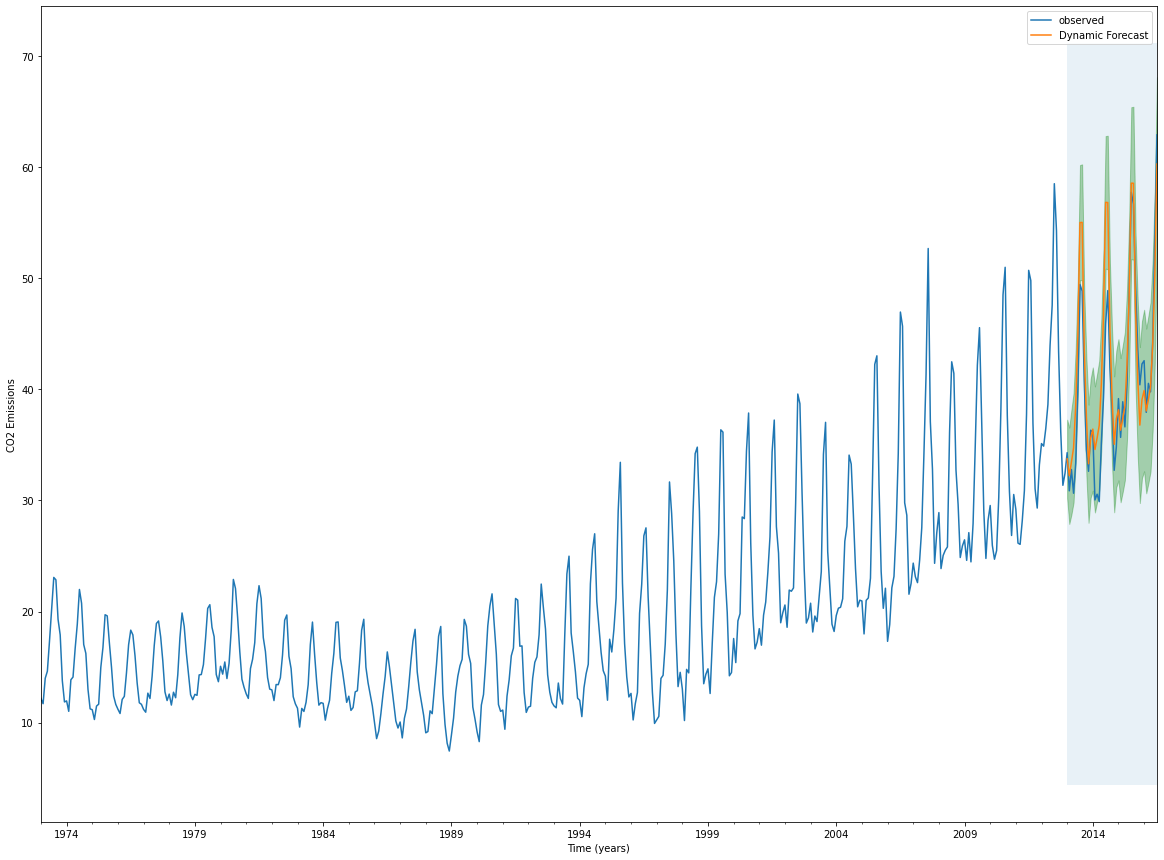

In [42]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='green', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [43]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_original = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_original) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_original)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forecast: 3.7936


# 6) Forecasting of 10 years or 120 months steps ahead in future

In [44]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062559,65.116049
2016-09-30,47.316614,55.987495
2016-10-31,40.736072,50.163095
2016-11-30,36.175923,46.010287
2016-12-31,38.095111,48.172698


We can use the output of this code to plot the time series and forecasts of its future values.

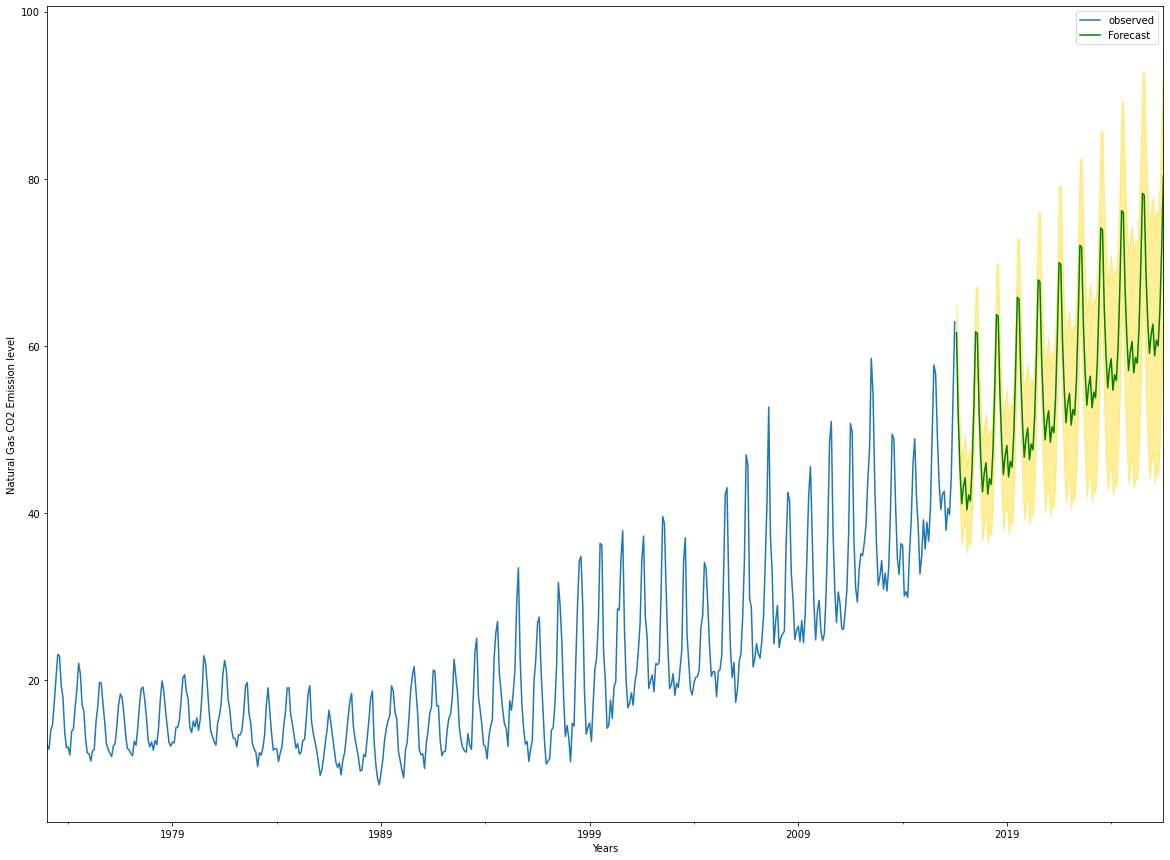

In [45]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='green')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='gold', alpha=.4)
ax.set_xlabel('Years')
ax.set_ylabel('Natural Gas CO2 Emission level')

plt.legend()
plt.show()